In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [33]:
file_name="insurance.csv"
df = pd.read_csv(file_name, header=None)
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [34]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


## Data Wrangling

In [36]:
df['age'].value_counts()

age
18    148
19    142
52     62
23     62
45     62
47     62
28     60
46     60
22     60
21     60
54     60
51     60
26     60
48     58
25     58
27     58
53     58
50     58
20     58
44     56
49     56
32     56
30     56
56     56
24     56
41     56
43     54
31     54
33     54
42     54
29     54
40     54
57     54
59     52
37     52
55     52
58     52
34     52
39     50
38     50
35     50
36     50
62     48
60     46
63     46
61     46
64     46
?       4
Name: count, dtype: int64

In [37]:
df['smoker'].value_counts().sort_index()

smoker
0    2201
1     564
?       7
Name: count, dtype: int64

In [38]:
df.replace('?', np.nan, inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [50]:
is_smoker = df['smoker'].value_counts().idxmax()
df['smoker'].replace(np.nan, is_smoker, inplace=True)

In [51]:
mean_age = df['age'].astype('float').mean()
df['age'].replace(np.nan, mean_age, inplace=True)

/tmp/ipykernel_9918/3907812031.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace(np.nan, mean_age, inplace=True)


In [52]:
df[['age', 'smoker']] = df[['age', 'smoker']].astype('int')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


In [54]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [55]:
df['charges'] = np.round(df['charges'], 2)

In [56]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


## Exploratory Data Analysis

(0.0, 66902.85800000001)

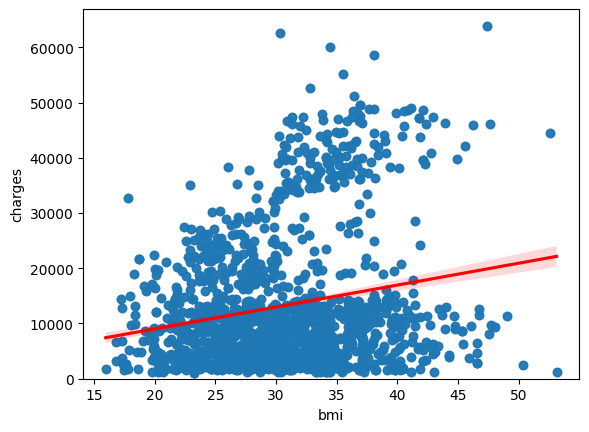

In [62]:
sns.regplot(x='bmi', y='charges', data=df, line_kws={'color':'red'})
plt.ylim(0, )

<Axes: xlabel='smoker', ylabel='charges'>

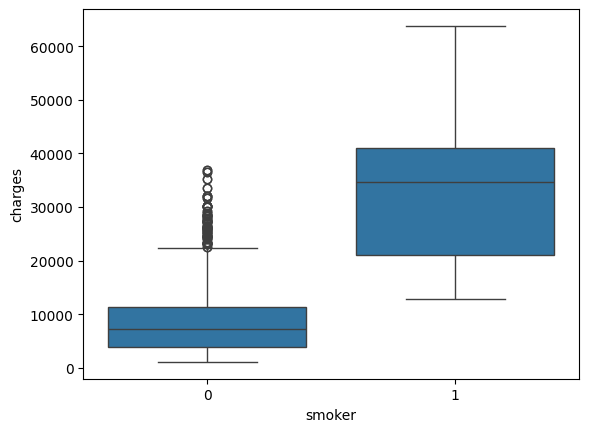

In [63]:
sns.boxplot(x='smoker', y='charges', data=df)

In [64]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


## Model Development

In [65]:
X = df[['smoker']]
Y = df['charges']

In [67]:
X, Y

(      smoker
 0          1
 1          0
 2          0
 3          0
 4          0
 ...      ...
 2767       0
 2768       0
 2769       1
 2770       0
 2771       0
 
 [2772 rows x 1 columns],
 0       16884.92
 1        1725.55
 2        4449.46
 3       21984.47
 4        3866.86
           ...   
 2767     8569.86
 2768     2020.18
 2769    16450.89
 2770    21595.38
 2771     9850.43
 Name: charges, Length: 2772, dtype: float64)

In [68]:
lm = LinearRegression()

In [87]:
lm.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [88]:
lm.score(X, Y)

0.6221791733924185

In [89]:
r2_score(Y, lm.predict(X))

0.6221791733924185

In [90]:
Z = df.iloc[:, :-1]

In [91]:
lm.fit(Z, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [92]:
lm.score(Z, Y)

0.7504083820289634

In [93]:
r2_score(Y, lm.predict(Z))

0.7504083820289634

In [94]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [95]:
pipe = Pipeline(Input)

In [96]:
Z = Z.astype('float')
Z

,age,gender,bmi,no_of_children,smoker,region
0,19.0,1.0,27.900,0.0,1.0,3.0
1,18.0,2.0,33.770,1.0,0.0,4.0
2,28.0,2.0,33.000,3.0,0.0,4.0
3,33.0,2.0,22.705,0.0,0.0,1.0
4,32.0,2.0,28.880,0.0,0.0,1.0
...,...,...,...,...,...,...
2767,47.0,1.0,45.320,1.0,0.0,4.0
2768,21.0,1.0,34.600,0.0,0.0,3.0
2769,19.0,2.0,26.030,1.0,1.0,1.0
2770,23.0,2.0,18.715,0.0,0.0,1.0


In [97]:
pipe.fit(Z, Y)

,steps,"[('scale', ...), ('polynomial', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'


In [98]:
ypipe = pipe.predict(Z)

In [99]:
r2_score(Y, ypipe)

0.8452576213500093